## Satyendra-Nath-Bose-ONLINE-Summer-Internship-Program-2021

### Project-3: Medical Expenditure Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Loading Data

In [2]:
data = pd.read_csv("medical_cost_data.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Categorical data

In [7]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [9]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Data Correlation

In [12]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

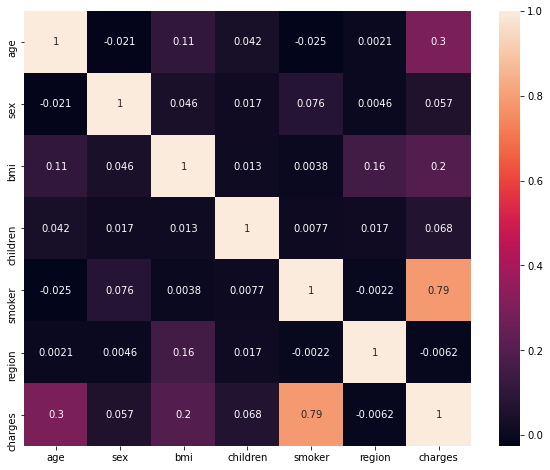

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, ax =ax, annot = True)

Clearly, a strong correlation is observed only with the fact of smoking the patient

### Smoker Analysis

C:\Users\VamsiKumarGudala\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


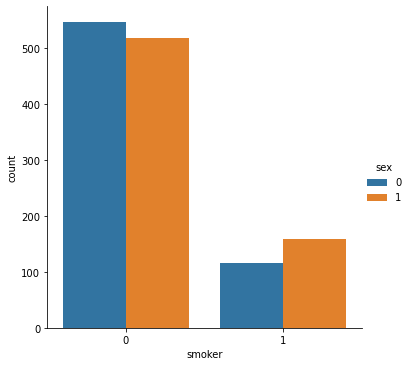

In [14]:
sns.factorplot(x="smoker", kind="count",hue = 'sex', data=data)

The total cost of treatment in men will be more than in women, given the impact of smoking.

### BMI Analysis

C:\Users\VamsiKumarGudala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


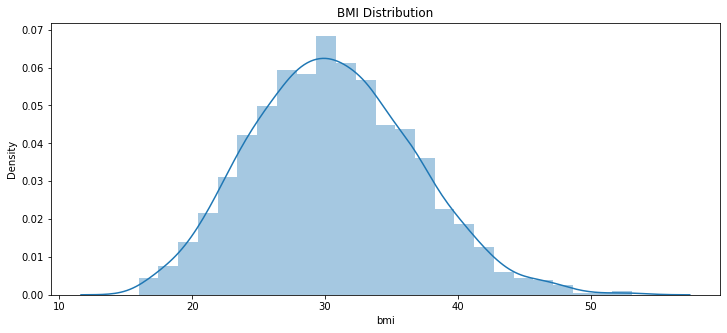

In [15]:
plt.figure(figsize=(12,5))
plt.title("BMI Distribution")
ax = sns.distplot(data["bmi"])

The average BMI in patients is 30.

### Children Count Analysis

C:\Users\VamsiKumarGudala\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\VamsiKumarGudala\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


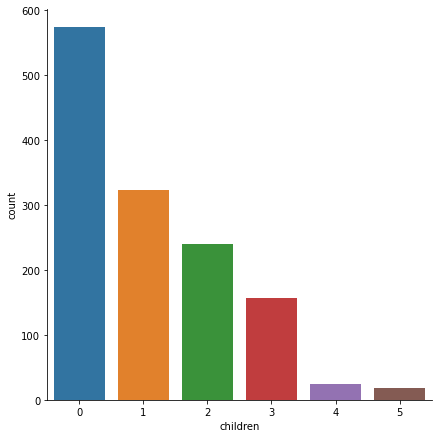

In [16]:
sns.factorplot(x="children", kind="count", data=data, size = 6)

Most patients do not have children.

In [17]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Splitting Data

In [18]:
# training dataset and labels
x = data.drop(data.columns[[6, 5]], axis = 1)
y = data['charges']

In [19]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [21]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

### Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.fit_transform(xtest)

In [23]:
xtrain[0:2]

array([[0.        , 0.        , 0.32970137, 0.        , 0.        ],
       [0.45652174, 0.        , 0.45305354, 0.        , 0.        ]])

## <font color = "green">**ML Models** </font>

In [26]:
linear = LinearRegression()
dt = DecisionTreeRegressor()
svr = svm.SVR()
rf = RandomForestRegressor()

### Training

In [27]:
linear.fit(xtrain, ytrain)

LinearRegression()

In [28]:
dt.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [29]:
svr.fit(xtrain, ytrain)

SVR()

In [30]:
rf.fit(xtrain, ytrain)

RandomForestRegressor()

### Prediction

In [31]:
y_pred_linear = linear.predict(xtest)
y_pred_dt = dt.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_rf = rf.predict(xtest)

### RMSE Error

In [32]:
import math
error_linear = math.sqrt(mean_squared_error((y_pred_linear), ytest))  
error_dt = math.sqrt(mean_squared_error(y_pred_dt, ytest))
error_svr = math.sqrt(mean_squared_error(y_pred_svr, ytest))  
error_rf = math.sqrt(mean_squared_error(y_pred_rf, ytest))

In [33]:
print ("    Model           :     RMSE Error\n" )
print ("Linear Regression   : ", error_linear)
print ("Decision Tree       : ", error_dt)
print ("Support Vector      : ", error_svr)
print ("Random Forest       : ", error_rf)

    Model           :     RMSE Error

Linear Regression   :  5827.61034882603
Decision Tree       :  7183.569498352961
Support Vector      :  13132.937356154958
Random Forest       :  5217.567271513942


## Thank you Dr. Saroj Kr. Biswas sir